<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>


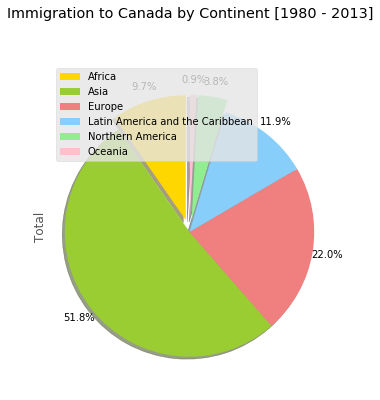

In [37]:
import numpy as np # useful for scientific computing
import pandas as pd # primary data structure library

df_can = pd.read_excel("Canada.xlsx", 
                      sheet_name = "Canada by Citizenship",
                      skiprows= range(20),
                      skipfooter = 2
                      )

# clean up dataset to remove unnecessary columns
df_can.drop(["AREA", "REG", "DEV", "Type", "Coverage"], axis=1, inplace=True)

# rename columns to make sense
df_can.rename(columns={"OdName": "Country", "AreaName":"Continent", "RegName":"Region"}, inplace=True)

# for consistency turn all column labels into string type
df_can.columns = list(map(str, df_can.columns))

# set country name as index - useful for quickly looking up countries using .loc method
df_can.set_index("Country", inplace=True)

# add total column
df_can["Total"]= df_can.sum(axis=1)

# years that we will be using to plot later on
years= list(map(str, range(1980, 2014)))


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use("ggplot") #optional


# group countries by continents and apply sum() function
df_continents = df_can.groupby("Continent", axis=0).sum()

print(type(df_can.groupby("Continent", axis=0)))
df_continents

colors_list=["gold", "yellowgreen", "lightcoral", "lightskyblue", "lightgreen", "pink"]
explode_list=[0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge

# autopct create %, start angle present starting point
df_continents ["Total"].plot(kind= "pie", 
                            figsize=(5,6),
                            autopct="%1.1f%%", #add in percentages
                            startangle=90, # start angle 90° (Africa)
                            shadow=True, # 3d shadow effect
                            labels=None, # turns labels off on pie chart
                            pctdistance=1.12, # the ratio between the center of each pie slice and the start of the text generated by autopct
                            colors= colors_list, # add custom colors
                            explode=explode_list #"explode" lowest 3 continents
                            )

plt.title("Immigration to Canada by Continent [1980 - 2013]", y=1.12) # y scales the title up by 12% to match pctdistance
plt.axis("equal") # sets the pie chart to look like a circle

#add legend
plt.legend(labels= df_continents.index, loc="upper left")

plt.show()